<h1>import all dependencies</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from dictionary_to_dataset import create_dataset
from model import ISLR_MODEL

<h1>Load the dataset</h1>

In [2]:
train_data_dir = "islr_dataset\\train"
val_data_dir = "islr_dataset\\val"
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "space"]

(x_train, y_train) = create_dataset(train_data_dir, categories, (64, 64))
(x_val, y_val) = create_dataset(val_data_dir, categories, (64, 64))

<h1>visualize the data</h1>

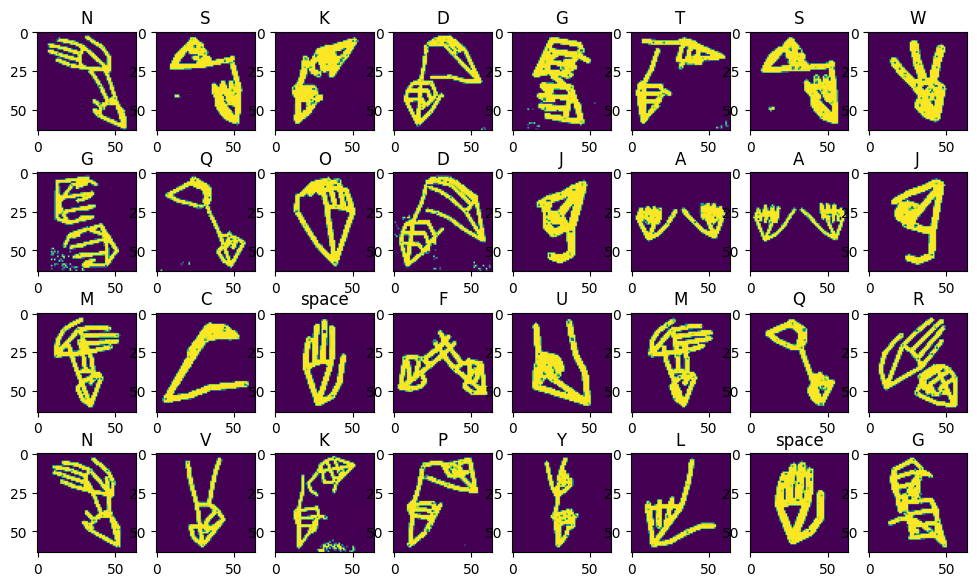

In [3]:
def display_images(features, labels):
    fig = plt.figure(figsize=(12, 7))
    rows = 4
    columns = 8
    for index in range(32):
        fig.add_subplot(rows, columns, index + 1)
        plt.imshow((features[index]))
        plt.title(categories[(labels[index])])
    plt.savefig("dataset.png")
display_images(x_train, y_train)

<h1>Pre process the dataset</h1>
<h3>1. Normalization</h3>
<h3>2. Data augmentation</h3>
<h3>3. One-hot encoding</h3>

In [4]:
# 1. normalize the dataset
x_train = x_train.reshape(-1, 64, 64, 1)
x_train = x_train.astype('float32') / 255.0

x_val = x_val.reshape(-1, 64, 64, 1)
x_val = x_val.astype('float32') / 255.0

In [6]:
# 2. appling data augmentation to the dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.08)
])

x_train = data_augmentation(x_train)
x_val = data_augmentation(x_val)

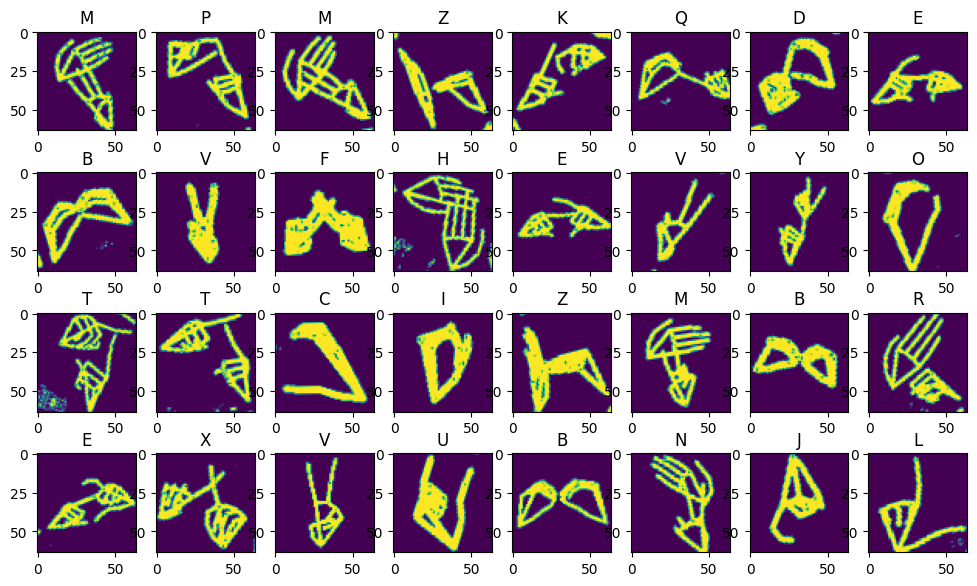

In [7]:
display_images(x_train[200:300], y_train[200:300])

In [8]:
#3. onehot or categorize the labels in 26 classes
y_train = tf.one_hot(y_train, 27)
y_val = tf.one_hot(y_val, 27)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(9879, 64, 64, 1)
(9879, 27)
(3655, 64, 64, 1)
(3655, 27)


In [10]:
model = ISLR_MODEL(64)
model.summary()

c:\Users\vatsp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,522,395 (32.51 MB)

 Trainable params: 8,522,395 (32.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE), metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/3
309/309 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step - accuracy: 0.6937 - loss: 1.0826 - val_accuracy: 0.9798 - val_loss: 0.0681
Epoch 2/3
309/309 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9900 - loss: 0.0398 - val_accuracy: 0.9926 - val_loss: 0.0242
Epoch 3/3
309/309 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9901 - loss: 0.0273 - val_accuracy: 0.9869 - val_loss: 0.0387


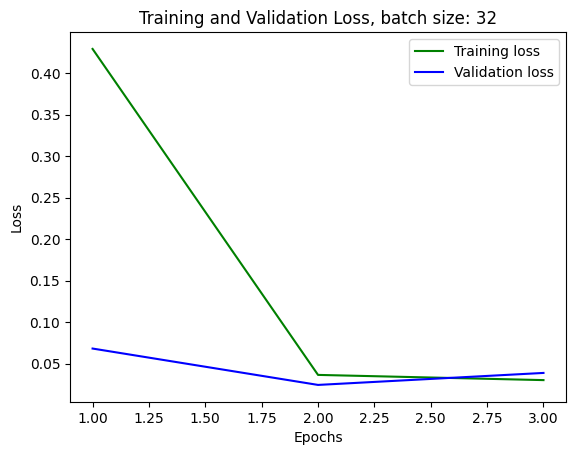

In [14]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
x = np.arange(3) + 1
plt.plot(x, loss_train, 'g', label='Training loss')
plt.plot(x, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation Loss, batch size: 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss.png")

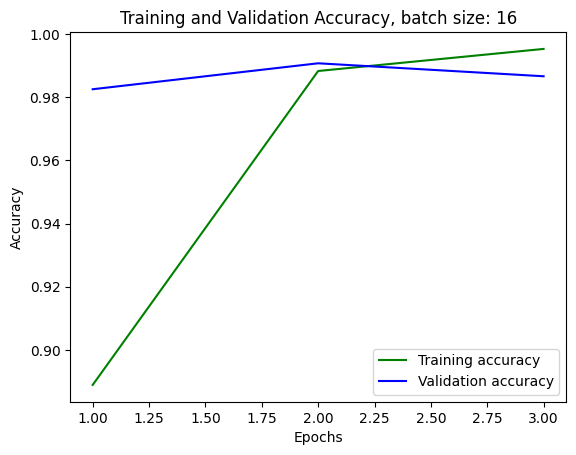

In [13]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
x = np.arange(3) + 1
plt.plot(x, loss_train, 'g', label='Training accuracy')
plt.plot(x, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy, batch size: 16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("acc.png")

In [15]:
predictions = model.predict(x_val)

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[2.7495750e-14 5.8817784e-13 8.2507396e-09 7.9567358e-10 9.1258750e-13
 3.7590538e-11 1.6321048e-06 4.9553398e-07 4.4723186e-16 3.8340206e-11
 4.1248522e-11 5.3825511e-19 1.2192198e-08 9.9999785e-01 1.3110754e-10
 6.9115076e-14 1.2887810e-10 7.1860259e-13 1.7943773e-14 8.4592590e-11
 3.3540979e-17 1.3918520e-18 9.8750486e-21 5.1647188e-16 6.4417512e-19
 5.6903419e-13 5.3644587e-16]


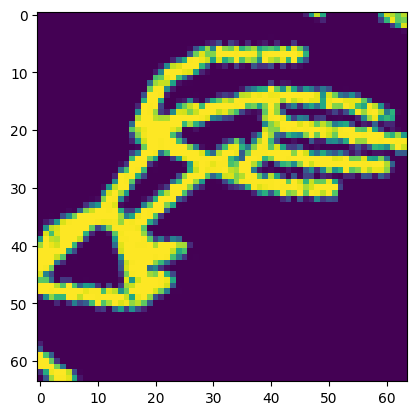

In [16]:
plt.imshow(x_val[4])
print(predictions[4])

In [17]:
print(predictions.shape)
predictions = np.argmax(predictions, axis=1)
print(predictions.shape)

(3655, 27)
(3655,)


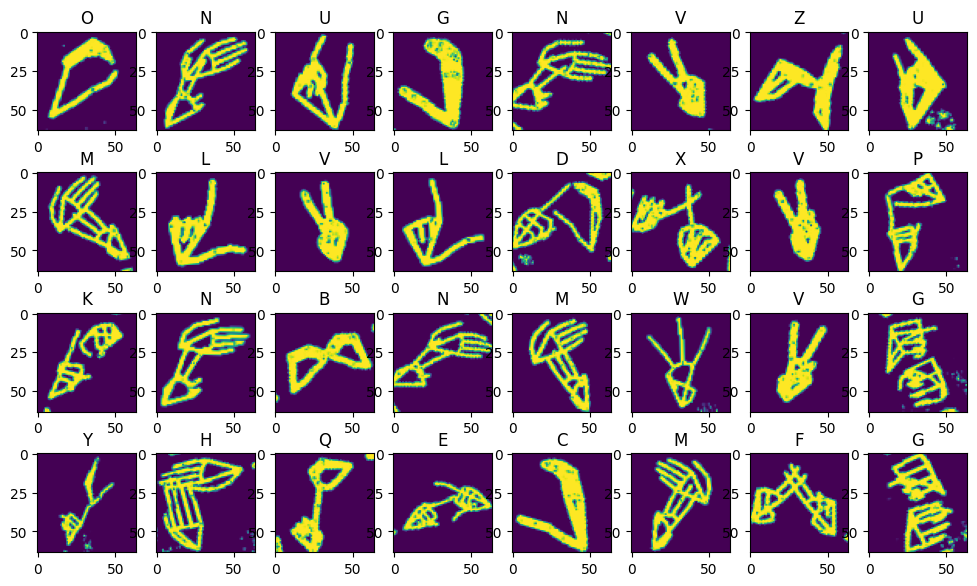

In [18]:
display_images(x_val, predictions)

In [19]:
#save the model
model.save("Model/islr_model_latest.h5")